In [ ]:
!pip install colorama

# **Import Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from mlxtend.plotting import plot_confusion_matrix
from colorama import Fore, Back, Style 

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


# **Import Dataset**

In [1]:
dataset = pd.read_csv('heart_records.csv')
dataset.head()

NameError: ignored

# **Data Exploratory**

In [ ]:
dataset.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [ ]:
dataset['DEATH_EVENT'].unique()

array([1, 0])

## Label Ratio

In [ ]:
print('Death', round(dataset['DEATH_EVENT'].value_counts()[1] / len(dataset) * 100, 2), '% of the dataset')
print('No Death', round(dataset['DEATH_EVENT'].value_counts()[0] / len(dataset) * 100, 2), '% of the dataset')

Death 32.11 % of the dataset
No Death 67.89 % of the dataset


## Death Event Distribution

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0.5, 1.0, 'Death Event Distribution \n (0: No Death || 1: Deatah)')

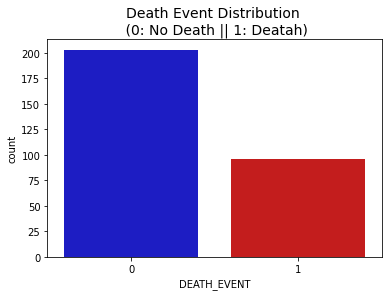

In [ ]:
colors = ['#0101df', '#df0101']

sns.countplot('DEATH_EVENT', data=dataset, palette=colors)
plt.title('Death Event Distribution \n (0: No Death || 1: Deatah)', fontsize=14)

## Dataset Description

In [ ]:
dataset.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


## Dataset Info

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [ ]:
dataset.shape

(299, 13)

## Dataset Columns

In [ ]:
dataset.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')


## Correlation matrix


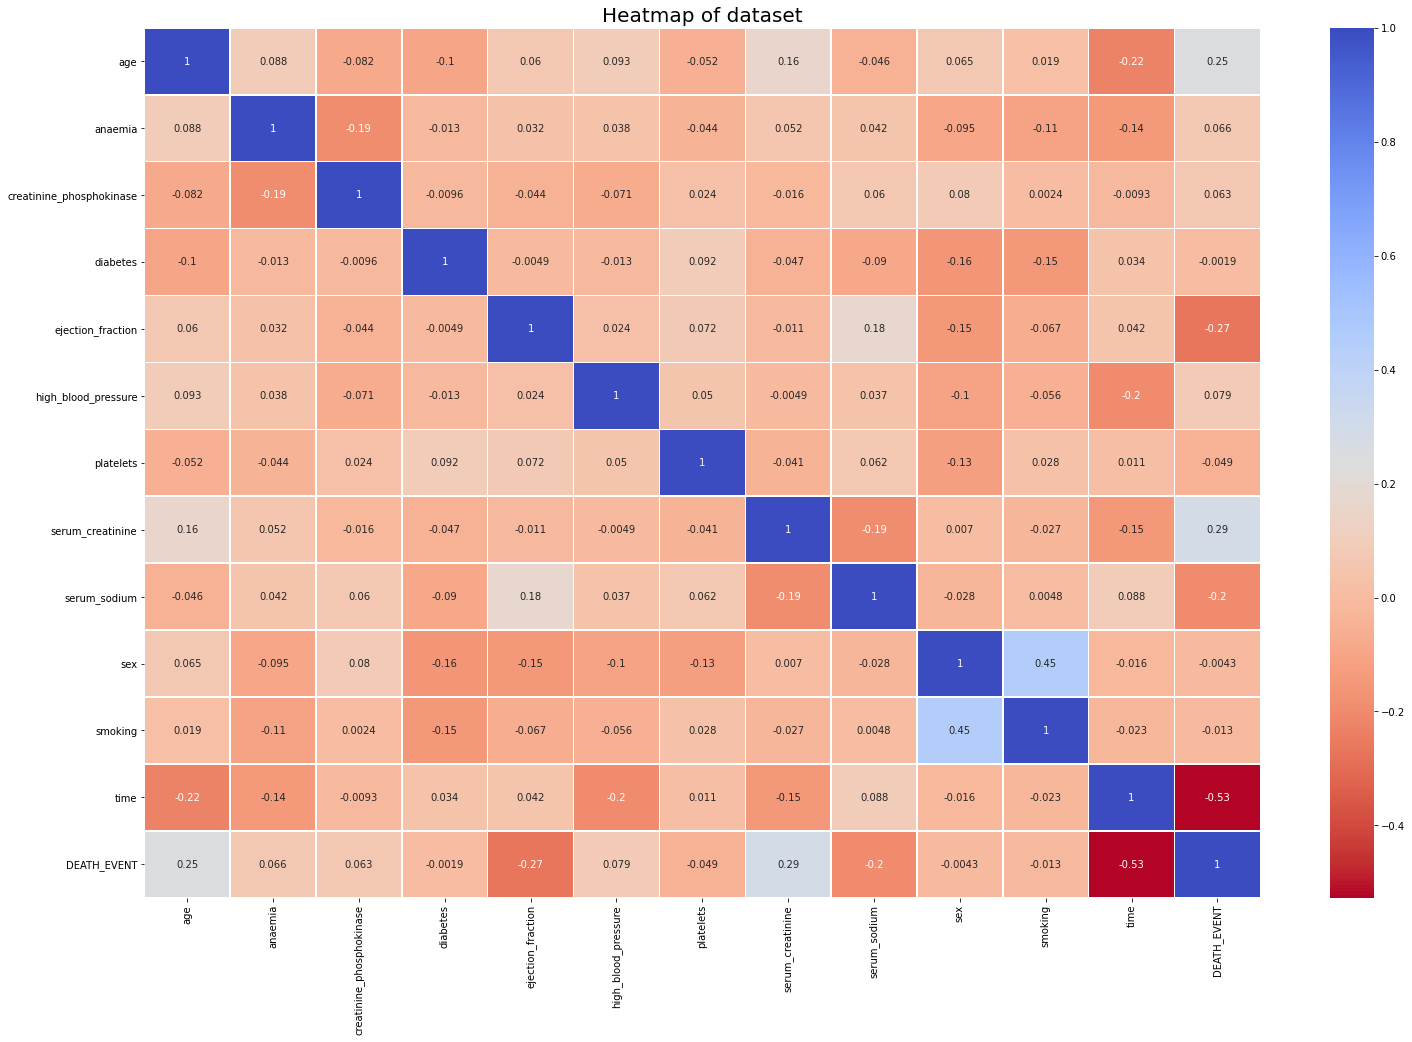

In [ ]:
corrmatrix = dataset.corr()
plt.figure(figsize=(25, 16))
hm = sns.heatmap(corrmatrix, annot = True, linewidths=.5, cmap='coolwarm_r')
hm.set_title(label='Heatmap of dataset', fontsize=20)
plt.show()

## Positive Correlation Plot

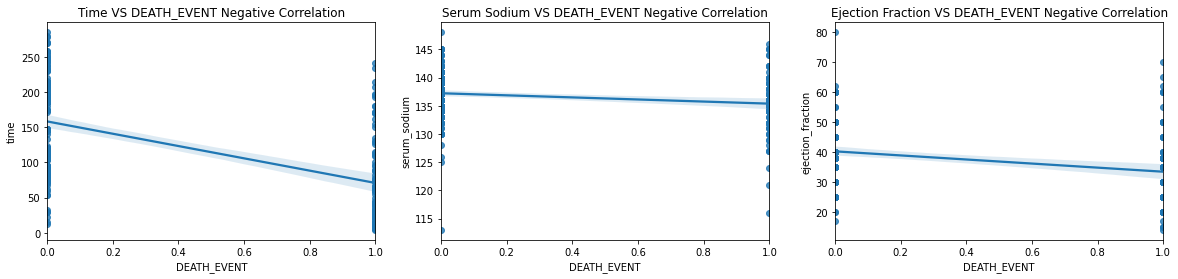

In [ ]:
f, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 4))

sns.regplot(x='DEATH_EVENT', y='time', data=dataset, ax=axes[0])
axes[0].set_title('Time VS DEATH_EVENT Negative Correlation')

sns.regplot(x='DEATH_EVENT', y='serum_sodium', data=dataset, ax=axes[1])
axes[1].set_title('Serum Sodium VS DEATH_EVENT Negative Correlation')

sns.regplot(x='DEATH_EVENT', y='ejection_fraction', data=dataset, ax=axes[2])
axes[2].set_title('Ejection Fraction VS DEATH_EVENT Negative Correlation')
plt.show()



## Negative Correlation Plot

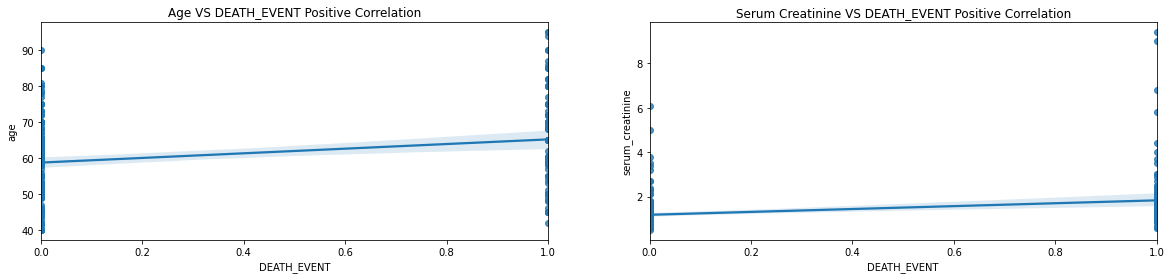

In [ ]:
f, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 4))

sns.regplot(x='DEATH_EVENT', y='age', data=dataset, ax=axes[0])
axes[0].set_title('Age VS DEATH_EVENT Positive Correlation')

sns.regplot(x='DEATH_EVENT', y='serum_creatinine', data=dataset, ax=axes[1])
axes[1].set_title('Serum Creatinine VS DEATH_EVENT Positive Correlation')

plt.show()

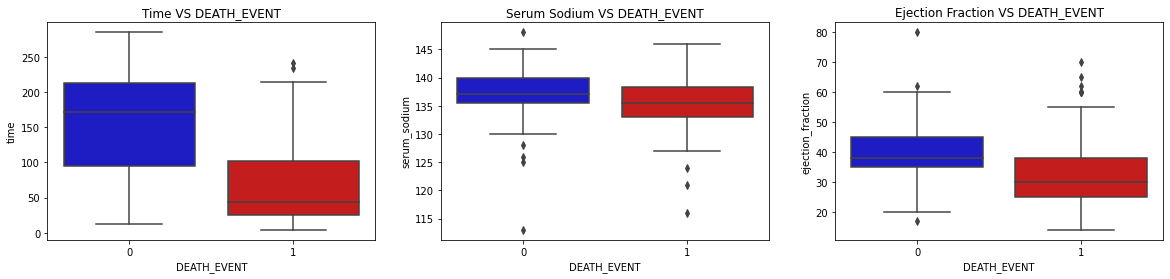

In [ ]:
colors = ['#0101df', '#df0101']

f, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 4))

# Negative Correlation with DEATH_EVENT (The lower our feature value the more likely it will be a death event)
sns.boxplot(x='DEATH_EVENT', y='time', data=dataset, palette=colors, ax=axes[0])
axes[0].set_title('Time VS DEATH_EVENT')

sns.boxplot(x='DEATH_EVENT', y='serum_sodium', data=dataset, palette=colors, ax=axes[1])
axes[1].set_title('Serum Sodium VS DEATH_EVENT')

sns.boxplot(x='DEATH_EVENT', y='ejection_fraction', data=dataset, palette=colors, ax=axes[2])
axes[2].set_title('Ejection Fraction VS DEATH_EVENT')

plt.show()

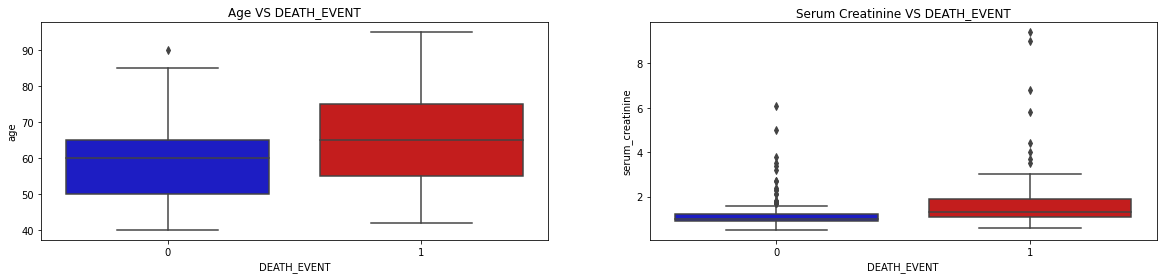

In [ ]:
f, axes = plt.subplots(nrows=1, ncols = 2, figsize=(20, 4))

# Positive Correlations with DEATH_EVENT (The higher the feature the probability increases that it will be a death event)
sns.boxplot(x='DEATH_EVENT', y='age', data=dataset, palette=colors, ax=axes[0])
axes[0].set_title('Age VS DEATH_EVENT')

sns.boxplot(x='DEATH_EVENT', y='serum_creatinine', data=dataset, palette=colors, ax=axes[1])
axes[1].set_title('Serum Creatinine VS DEATH_EVENT')

plt.show()

## Normal Distribution Plot

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



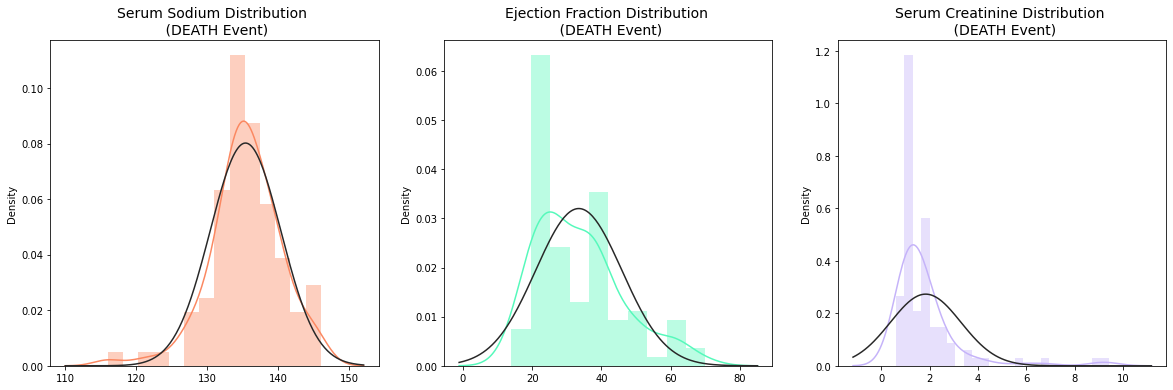

In [ ]:
from scipy.stats import norm

f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 6))

sodium_death_dist = dataset['serum_sodium'].loc[dataset['DEATH_EVENT'] == 1].values
sns.distplot(sodium_death_dist, ax=ax1, fit=norm, color='#FB8861')
ax1.set_title('Serum Sodium Distribution \n (DEATH Event)', fontsize=14)

ejection_death_dist = dataset['ejection_fraction'].loc[dataset['DEATH_EVENT'] == 1].values
sns.distplot(ejection_death_dist, ax=ax2, fit=norm, color='#56F9BB')
ax2.set_title('Ejection Fraction Distribution \n (DEATH Event)', fontsize=14)

creatinine_death_dist = dataset['serum_creatinine'].loc[dataset['DEATH_EVENT'] == 1].values
sns.distplot(creatinine_death_dist, ax=ax3, fit=norm, color='#C5B3F9')
ax3.set_title('Serum Creatinine Distribution \n (DEATH Event)', fontsize=14)

plt.show()

## Patient age Vs Death Event Plot

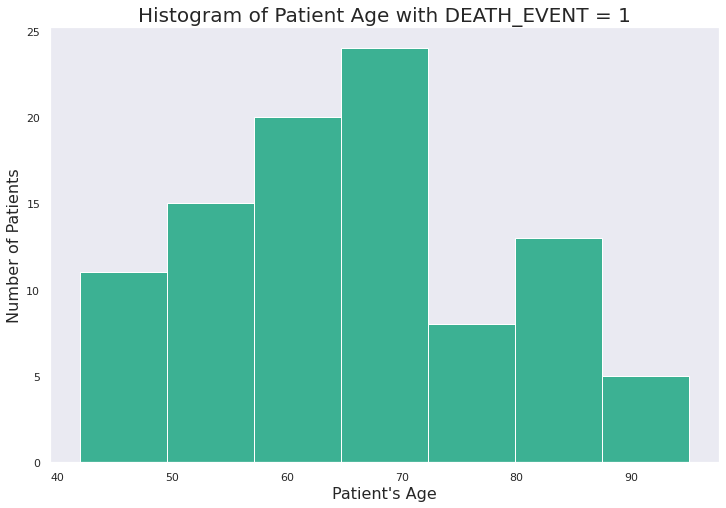

In [ ]:
sns.set(style='dark', palette='colorblind', color_codes=True)
x = dataset.loc[dataset['DEATH_EVENT'] == 1]['age']
plt.figure(figsize=(12, 8))
ax = sns.histplot(x, bins=7, kde=False, color='g')
ax.set_xlabel(xlabel='Patient\'s Age', fontsize=16)
ax.set_ylabel(ylabel='Number of Patients', fontsize=16)
ax.set_title(label='Histogram of Patient Age with DEATH_EVENT = 1', fontsize=20)
plt.show()

In [ ]:
dataset_death = dataset.loc[dataset['DEATH_EVENT'] == 1]
targeted_columns = ['age', 'serum_creatinine', 'time', 'serum_sodium', 'ejection_fraction']

## Top Five Eldest Death Event

In [ ]:
# Top Five Eldest Death Event
dataset_death.sort_values('age', ascending=False)[targeted_columns].head(5).reset_index(drop=True)

,age,serum_creatinine,time,serum_sodium,ejection_fraction
0,95.0,2.00,50,132,30
1,95.0,1.00,24,138,40
2,94.0,1.83,27,134,38
3,90.0,2.10,8,132,40
4,90.0,1.00,30,134,50


## Top Five Youngest Death Event

In [ ]:
# Top Five Youngest Death Event
dataset_death.sort_values('age')[targeted_columns].head(5).reset_index(drop=True)

,age,serum_creatinine,time,serum_sodium,ejection_fraction
0,42.0,1.3,65,136,15
1,45.0,1.1,129,139,30
2,45.0,1.0,61,145,35
3,45.0,1.0,60,139,25
4,45.0,0.8,14,127,14


## Box plots


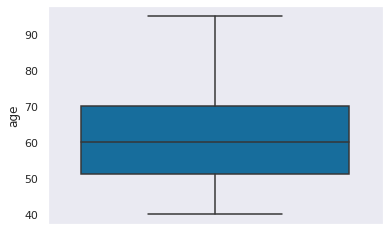

In [ ]:

sns.boxplot(y=dataset.age)

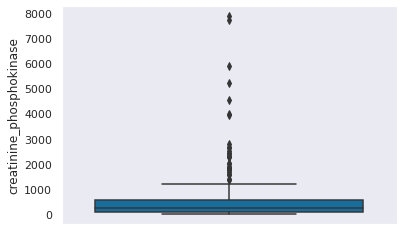

In [ ]:
sns.boxplot(y=dataset.creatinine_phosphokinase)

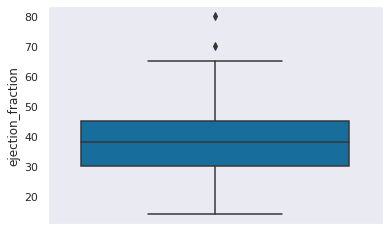

In [ ]:
sns.boxplot(y=dataset.ejection_fraction)


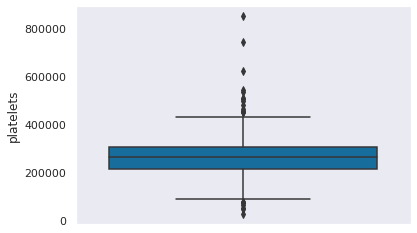

In [ ]:
sns.boxplot(y=dataset.platelets)


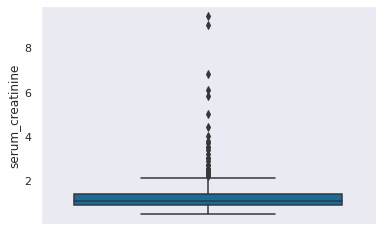

In [ ]:
sns.boxplot(y=dataset.serum_creatinine)


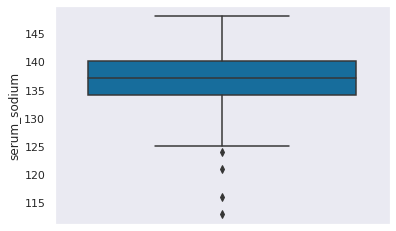

In [ ]:
sns.boxplot(y=dataset.serum_sodium)


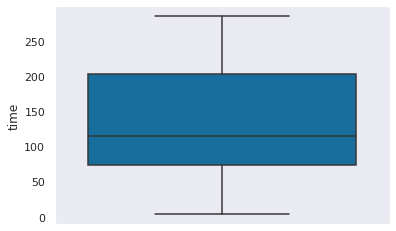

In [ ]:
sns.boxplot(y=dataset.time)

## Pair Grid


/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:1912: UserWarning:

The `size` parameter has been renamed to `height`; please update your code.



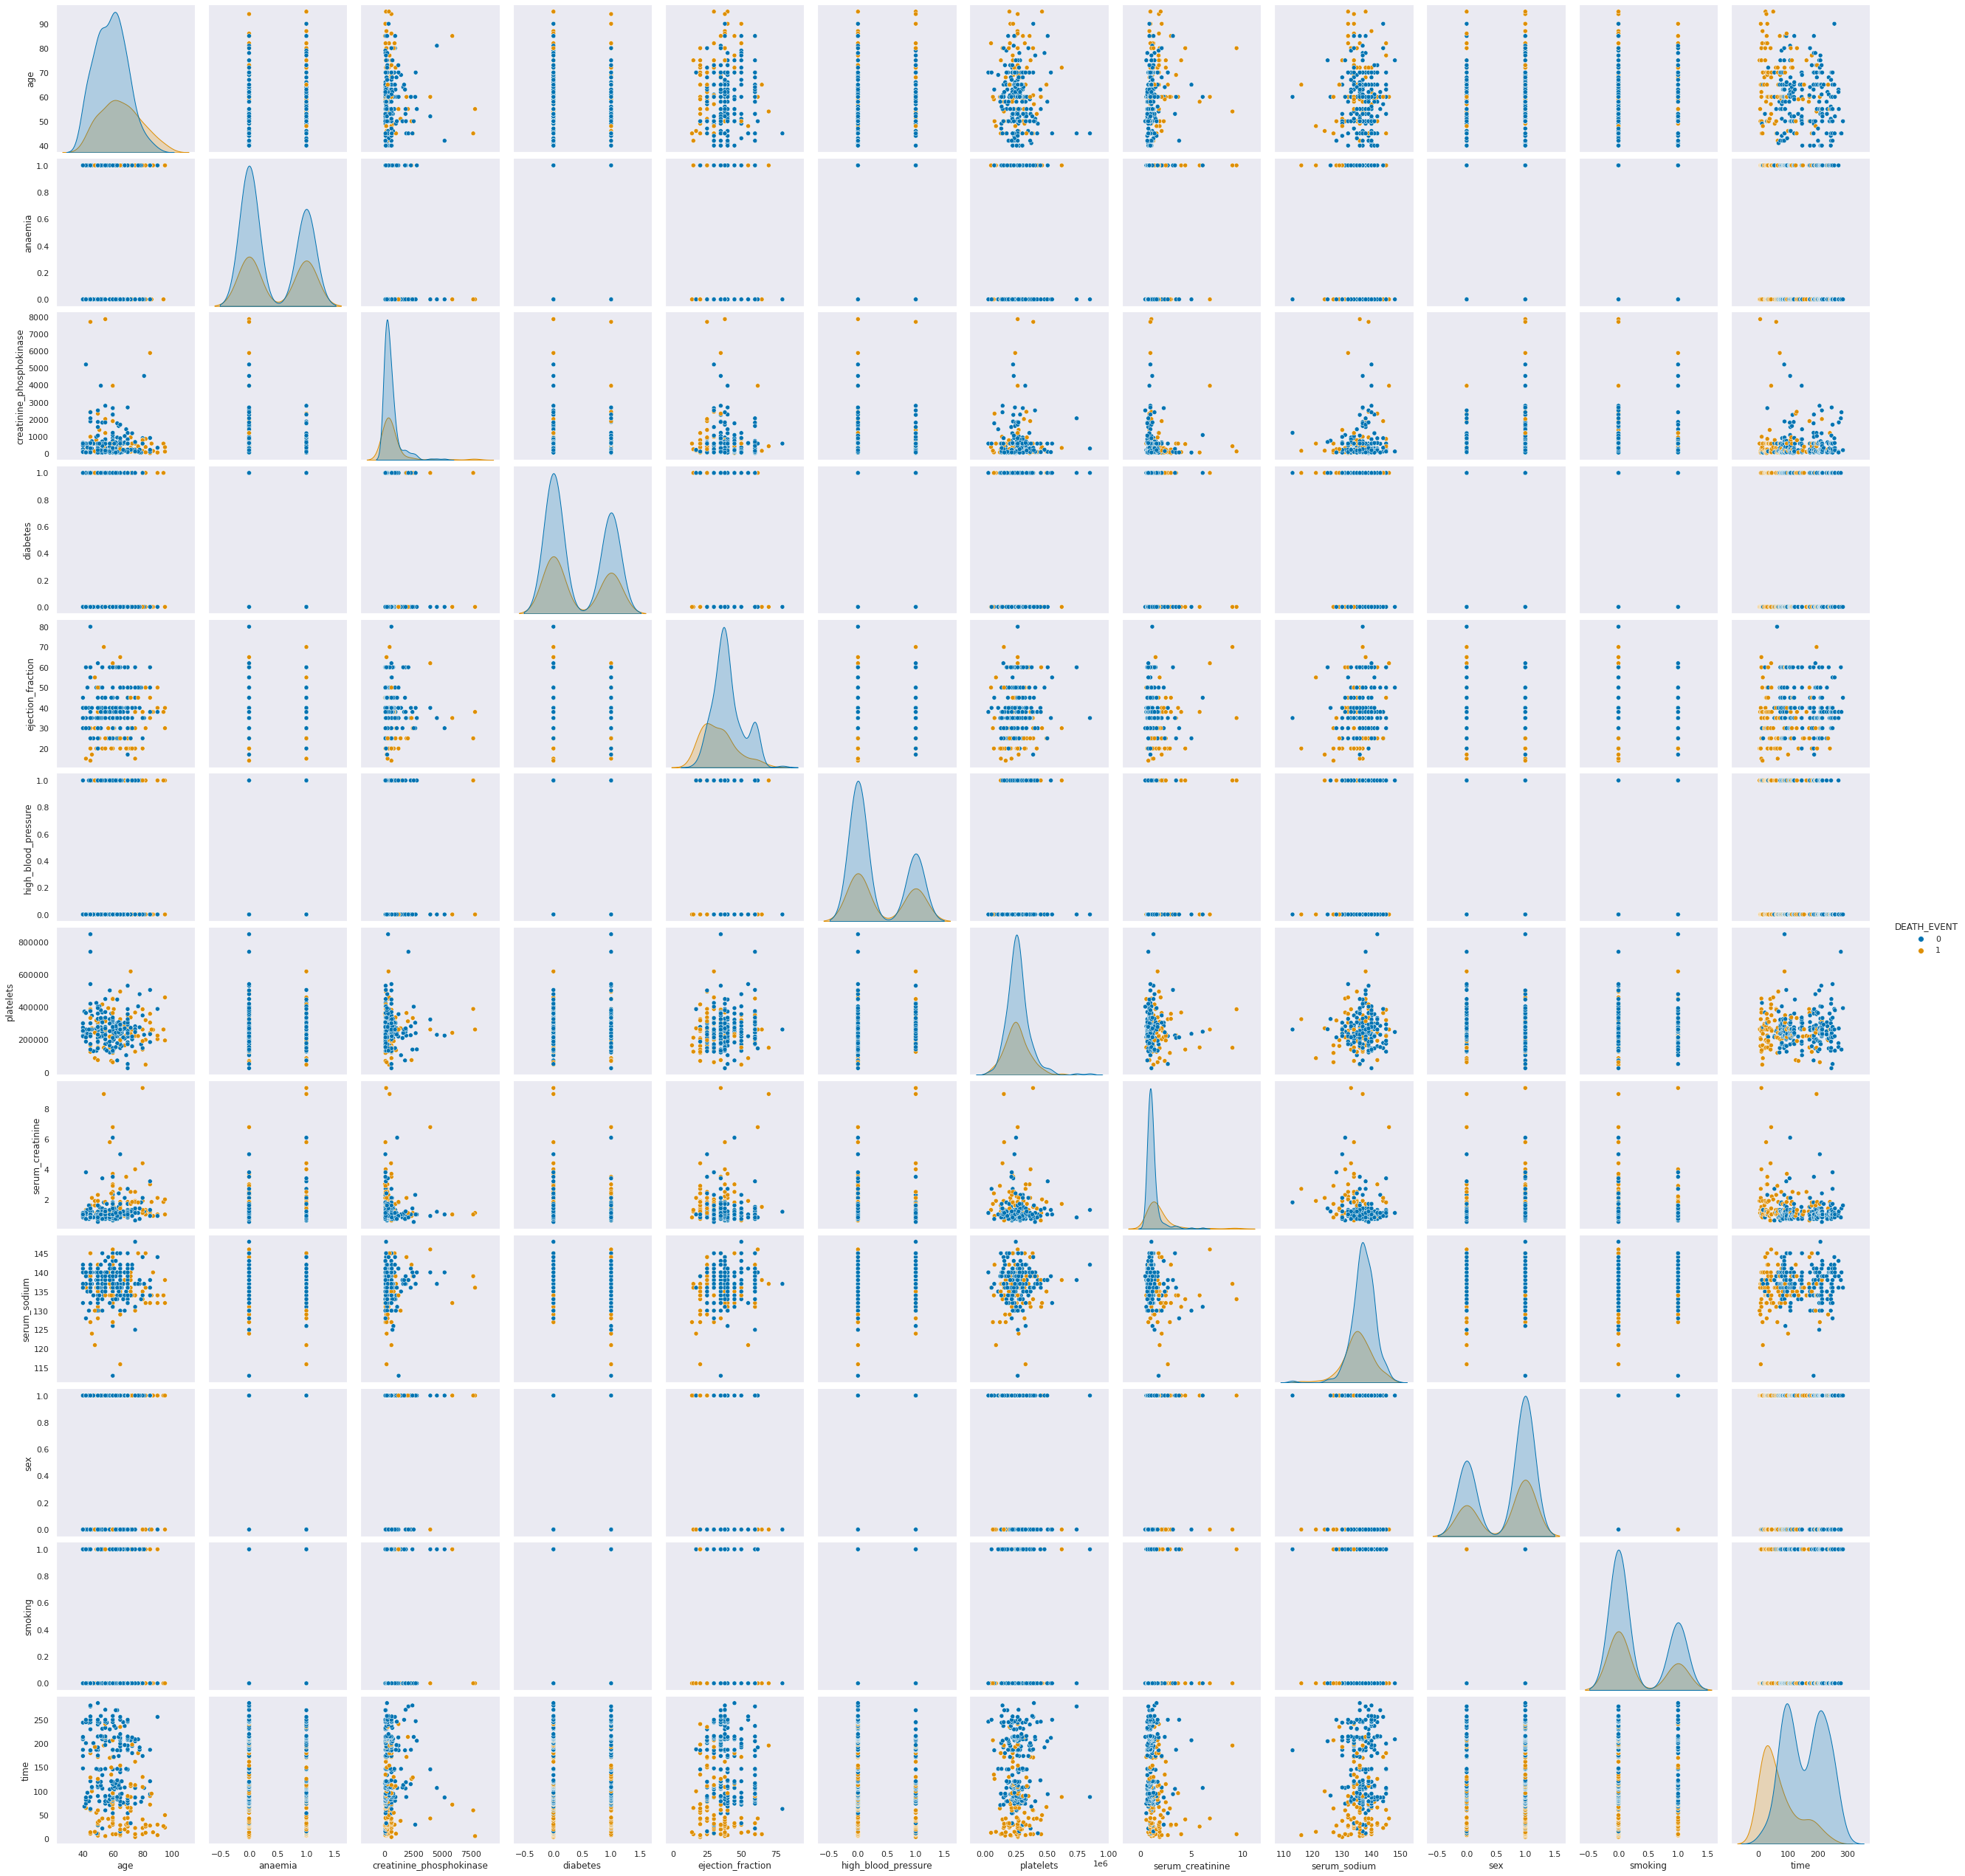

In [ ]:
sns.pairplot(dataset, hue="DEATH_EVENT", size=3, diag_kind="kde")


# **Data Preprocessing**

## Remove Outliers

In [ ]:
# Removing ejection outliers from death
ejection_death = dataset['ejection_fraction'].loc[dataset['DEATH_EVENT'] == 1].values
q25, q75 = np.percentile(ejection_death, 25), np.percentile(ejection_death, 75)
ejection_iqr = q75 - q25
ejection_cut_off = ejection_iqr * 1.5
ejection_lower, ejection_upper = q25 - ejection_cut_off, q75 + ejection_cut_off
print('Ejection Fraction Cut Off: {}'.format(ejection_cut_off))
print('Ejection Fraction Lower: {}'.format(ejection_lower))
print('Ejection Fraction Upper: {}'.format(ejection_upper))

outliers = [x for x in ejection_death if x < ejection_lower or x > ejection_upper]
print('Feature Ejection Fraction Outliers for Death Case: {}'.format(len(outliers)))
print('Ejection Fraction Outliers: {}'.format(outliers))
dataset = dataset.drop(dataset[(dataset['ejection_fraction'] > ejection_upper) | (dataset['ejection_fraction'] < ejection_lower)].index)
print('---' * 10)


# Removing serum creatinine outliers from death
creatinine_death = dataset['serum_creatinine'].loc[dataset['DEATH_EVENT'] == 1].values
q25, q75 = np.percentile(creatinine_death, 25), np.percentile(creatinine_death, 75)
creatinine_iqr = q75 - q25
creatinine_cut_off = creatinine_iqr * 1.5
creatinine_lower, creatinine_upper = q25 - creatinine_cut_off, q75 + creatinine_cut_off
print('Serum Creatinine Cut Off: {}'.format(creatinine_cut_off))
print('Serum Creatinine Lower: {}'.format(creatinine_lower))
print('Serum Creatinine Upper: {}'.format(creatinine_upper))

outliers = [x for x in creatinine_death if x < creatinine_lower or x > creatinine_upper]
print('Feature Serum Creatinine Outliers for Death Case: {}'.format(len(outliers)))
print('Serum Creatinine Outliers: {}'.format(outliers))
dataset = dataset.drop(dataset[(dataset['serum_creatinine'] > creatinine_upper) | (dataset['serum_creatinine'] < creatinine_lower)].index)
print('---' * 10)

Ejection Fraction Cut Off: 19.5
Ejection Fraction Lower: 5.5
Ejection Fraction Upper: 57.5
Feature Ejection Fraction Outliers for Death Case: 7
Ejection Fraction Outliers: [60, 65, 60, 62, 60, 60, 70]
------------------------------
Serum Creatinine Cut Off: 1.3499999999999999
Serum Creatinine Lower: -0.34999999999999987
Serum Creatinine Upper: 3.25
Feature Serum Creatinine Outliers for Death Case: 6
Serum Creatinine Outliers: [9.4, 4.0, 5.8, 3.5, 4.4, 3.7]
------------------------------


Text(0.5, 1.0, 'Serum Creatinine Feature \n (Reduction of outliers)')

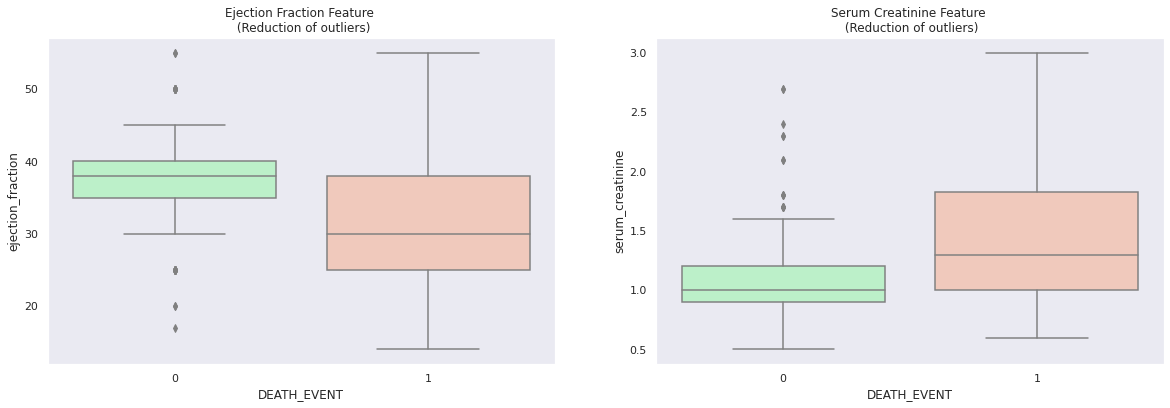

In [ ]:
colors = ['#B3F9C5', '#f9c5b3']
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6))

# Boxplots with outliers removed
# Feature Ejection Fraction
sns.boxplot(x='DEATH_EVENT', y='ejection_fraction', data=dataset, ax=ax1, palette=colors)
ax1.set_title('Ejection Fraction Feature \n (Reduction of outliers)')

sns.boxplot(x='DEATH_EVENT', y='serum_creatinine', data=dataset, ax=ax2, palette=colors)
ax2.set_title('Serum Creatinine Feature \n (Reduction of outliers)')


In [ ]:
X = dataset.iloc[:, :-1]
y = dataset.iloc[:, -1]

In [ ]:
X.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8


In [ ]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: DEATH_EVENT, dtype: int64

## Feature Selection

[0.08498615 0.02414617 0.07635711 0.02946103 0.14041025 0.02776258
 0.06634626 0.12830416 0.07723532 0.02590674 0.02867889 0.29040534]


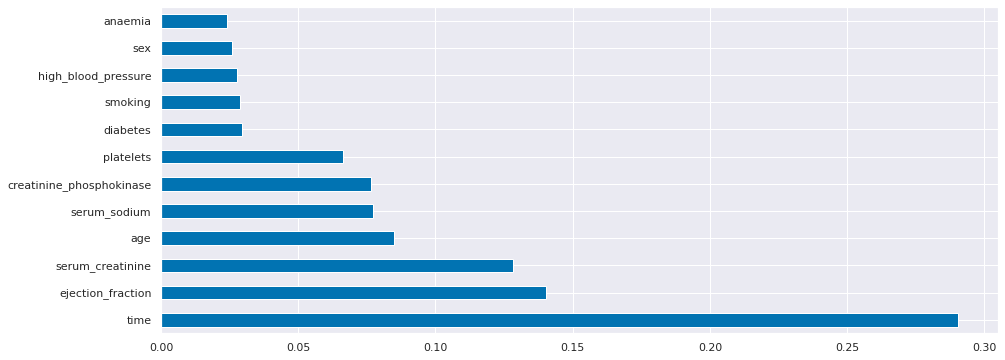

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize']=15,6 
sns.set_style("darkgrid")

model = ExtraTreesClassifier()
model.fit(X,y)

print(model.feature_importances_) 
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(12).plot(kind='barh')
plt.show()

## PCA

In [ ]:
pca = PCA()
sc = StandardScaler()
X = sc.fit_transform(X)
pca.fit_transform(X)

array([[ 2.01127473,  2.52880559, -0.10690759, ..., -0.55508646,
        -0.1480824 , -0.86155329],
       [-2.06362347,  0.68528034,  0.51013693, ...,  0.31863493,
        -0.5000231 ,  0.35083919],
       [-0.04859769,  3.06947025,  0.43520237, ...,  0.69369933,
         1.49298845, -0.50155855],
       ...,
       [-0.9838875 , -1.59639369,  0.72392695, ..., -0.28301603,
         0.44680721,  0.75049776],
       [-3.07084804,  0.26664448,  0.74334911, ..., -0.00785972,
        -0.64465744,  1.7125488 ],
       [-2.08108653,  0.01104317,  0.63474112, ..., -0.08238762,
        -0.61825716,  0.74592853]])

In [ ]:
explained_variance_ratio = pca.explained_variance_ratio_
explained_variance_ratio = [x * 100 for x in explained_variance_ratio]

In [ ]:
explained_variance_ratio

[14.052802652569405,
 13.969626923355158,
 10.807550910825618,
 9.713489942469643,
 9.111996945456173,
 8.513576936198316,
 7.277803203339932,
 6.848847535470316,
 5.936402182209726,
 5.348908604177716,
 4.224957551740602,
 4.1940366121874035]

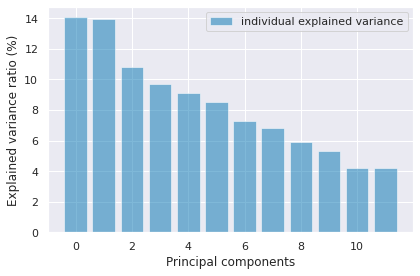

In [ ]:
plt.style.context('dark_background')
plt.figure(figsize=(6, 4))
    
plt.bar(range(12), explained_variance_ratio, alpha=0.5, align='center',
        label='individual explained variance')
plt.ylabel('Explained variance ratio (%)')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [ ]:
N = dataset.iloc[:, :-1]
pca = PCA(n_components=2)
x = pca.fit_transform(N)

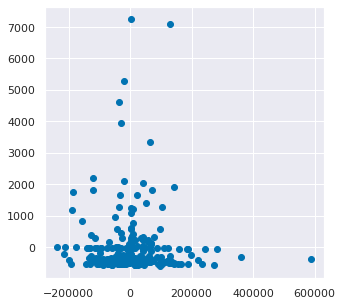

In [ ]:
plt.figure(figsize=(5, 5))
plt.scatter(x[:, 0], x[:, 1])
plt.show()

## Clustering

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=0)
X_clustered = kmeans.fit_predict(N)

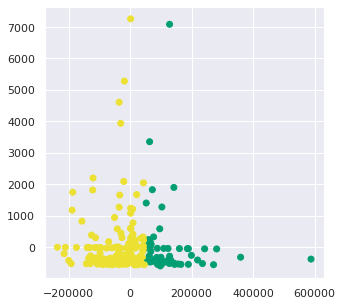

In [ ]:
LABEL_COLOURED_MAP = {
    0: 'g',
    1: 'y'
}

label_color = [LABEL_COLOURED_MAP[l] for l in X_clustered]
plt.figure(figsize=(5, 5))
plt.scatter(x[:, 0], x[:, 1], c=label_color)
plt.show()

## Splitting the dataset into the Training set and Test set

In [ ]:
X = dataset.iloc[:, [4,7,11]]
y = dataset.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

## Feature Scaling


In [ ]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# **Data Modeling**

In [ ]:
accuracy_list = []

## *Logistic Regression*





### Train Logistic Regression Model

In [ ]:
logistic_classifier = LogisticRegression(random_state=0)
logistic_classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

### Predicting the Test set results

In [ ]:
log_y_pred = logistic_classifier.predict(X_test)

### Confusion Matrix

<Figure size 1080x432 with 0 Axes>

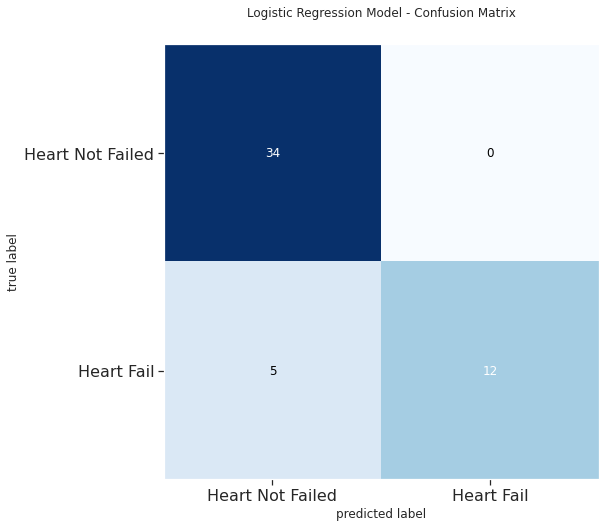

In [ ]:
cm = confusion_matrix(y_test, log_y_pred)
plt.figure()
plot_confusion_matrix(cm, figsize=(12,8), hide_ticks=True, cmap=plt.cm.Blues)
plt.title("Logistic Regression Model - Confusion Matrix")
plt.xticks(range(2), ["Heart Not Failed","Heart Fail"], fontsize=16)
plt.yticks(range(2), ["Heart Not Failed","Heart Fail"], fontsize=16)
plt.show()

### Accuracy Score

In [ ]:
log_ac = accuracy_score(y_test, log_y_pred)
print(Fore.GREEN + "Accuracy of Logistic Regression is : ", "{:.2f}%".format(100* log_ac))
accuracy_list.append(100*log_ac)

Accuracy of Logistic Regression is :  90.20%


## *Support Vector Machine (SVM)*

### *Train SVM Model*

In [ ]:
svm_classifier = SVC(kernel = 'linear', random_state = 0)
svm_classifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

### Predicting the Test set results

In [ ]:
svm_y_pred = svm_classifier.predict(X_test)

### Confusion Matrix

<Figure size 1080x432 with 0 Axes>

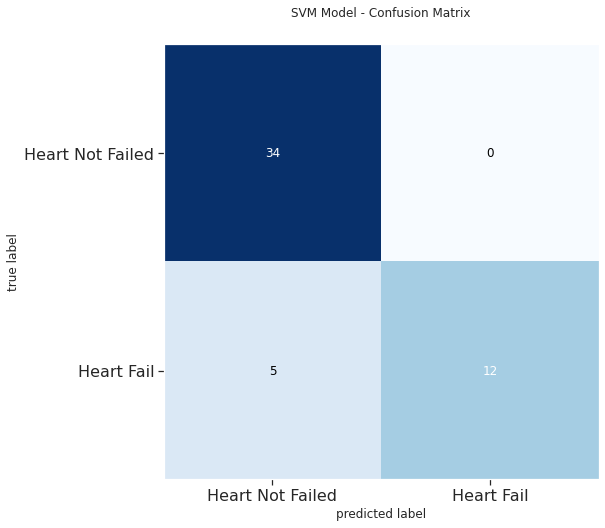

In [ ]:
cm = confusion_matrix(y_test, svm_y_pred)
plt.figure()
plot_confusion_matrix(cm, figsize=(12,8), hide_ticks=True, cmap=plt.cm.Blues)
plt.title("SVM Model - Confusion Matrix")
plt.xticks(range(2), ["Heart Not Failed","Heart Fail"], fontsize=16)
plt.yticks(range(2), ["Heart Not Failed","Heart Fail"], fontsize=16)
plt.show()

### Accuracy Score

In [ ]:
svm_ac = accuracy_score(y_test, svm_y_pred)
print(Fore.GREEN + "Accuracy of Support Vector Machine is : ", "{:.2f}%".format(100* svm_ac))
accuracy_list.append(100*svm_ac)

Accuracy of Support Vector Machine is :  90.20%


## Kernel SVM

### Train Kernel SVM Model

In [ ]:
kernel_svm_classifier = SVC(kernel = 'rbf', random_state = 0)
kernel_svm_classifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

### Predicting the Test set results

In [ ]:
kernel_svm_y_pred = kernel_svm_classifier.predict(X_test)

### Confusion Matrix

<Figure size 1080x432 with 0 Axes>

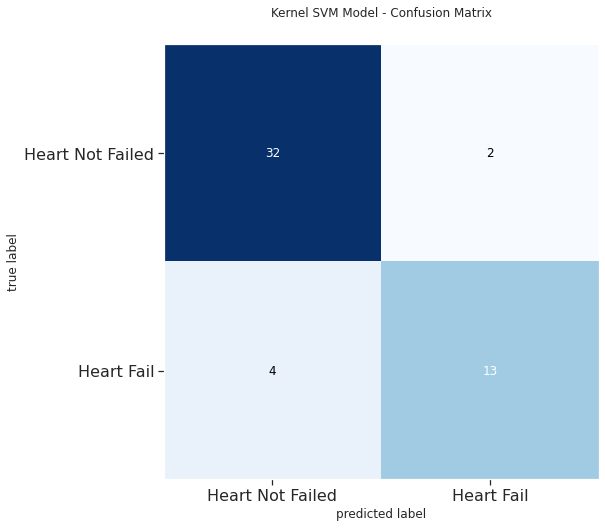

In [ ]:
cm = confusion_matrix(y_test, kernel_svm_y_pred)
plt.figure()
plot_confusion_matrix(cm, figsize=(12,8), hide_ticks=True, cmap=plt.cm.Blues)
plt.title("Kernel SVM Model - Confusion Matrix")
plt.xticks(range(2), ["Heart Not Failed","Heart Fail"], fontsize=16)
plt.yticks(range(2), ["Heart Not Failed","Heart Fail"], fontsize=16)
plt.show()

### Accuracy Score

In [ ]:
kernel_svm_ac = accuracy_score(y_test, kernel_svm_y_pred)
print(Fore.GREEN + "Accuracy of Kernel Support Vector Machine is : ", "{:.2f}%".format(100* kernel_svm_ac))
accuracy_list.append(100*kernel_svm_ac)

Accuracy of Kernel Support Vector Machine is :  88.24%


## Naive Bayes Classifier

### Train Naive Bayes Model

In [ ]:
naive_classifier = GaussianNB()
naive_classifier.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

### Predicting the Test set results

In [ ]:
naive_y_pred = naive_classifier.predict(X_test)

### Confusion Matrix

<Figure size 1080x432 with 0 Axes>

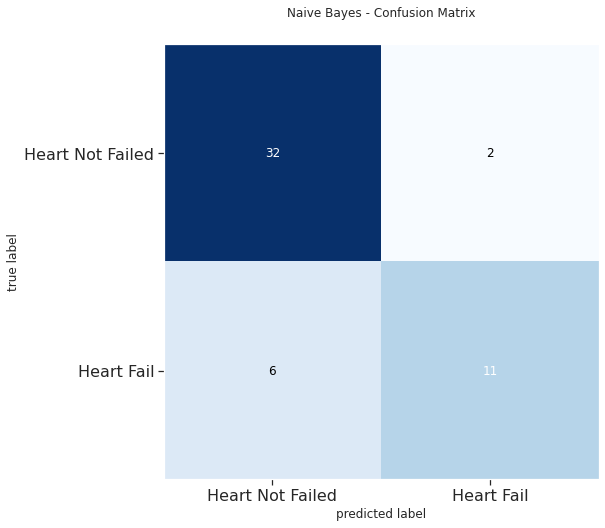

In [ ]:
cm = confusion_matrix(y_test, naive_y_pred)
plt.figure()
plot_confusion_matrix(cm, figsize=(12,8), hide_ticks=True, cmap=plt.cm.Blues)
plt.title("Naive Bayes - Confusion Matrix")
plt.xticks(range(2), ["Heart Not Failed","Heart Fail"], fontsize=16)
plt.yticks(range(2), ["Heart Not Failed","Heart Fail"], fontsize=16)
plt.show()

### Accuracy Score

In [ ]:
naive_ac = accuracy_score(y_test, naive_y_pred)
print(Fore.GREEN + "Accuracy of Naive Bayes is : ", "{:.2f}%".format(100* naive_ac))
accuracy_list.append(100*naive_ac)

Accuracy of Naive Bayes is :  84.31%


## K-Nearest Neighbors (KNN)

### Train KNN Model

In [ ]:
knn_classifier = KNeighborsClassifier(n_neighbors = 6, metric = 'minkowski', p = 2)
knn_classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='uniform')

### Predicting the Test set results

In [ ]:
knn_y_pred = knn_classifier.predict(X_test)

### Confusion Matrix

<Figure size 1080x432 with 0 Axes>

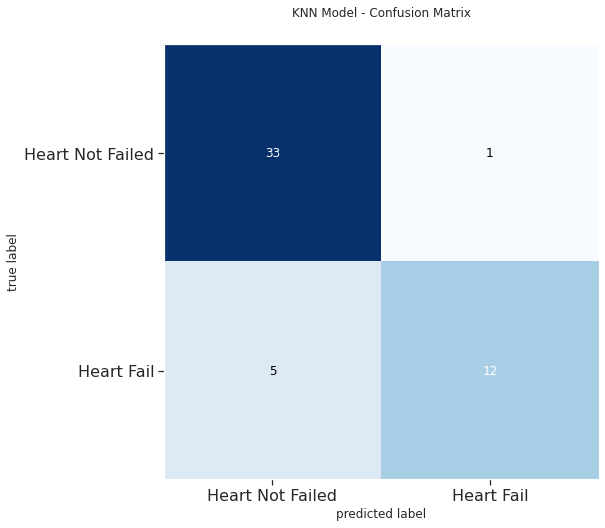

In [ ]:
cm = confusion_matrix(y_test, knn_y_pred)
plt.figure()
plot_confusion_matrix(cm, figsize=(12,8), hide_ticks=True, cmap=plt.cm.Blues)
plt.title("KNN Model - Confusion Matrix")
plt.xticks(range(2), ["Heart Not Failed","Heart Fail"], fontsize=16)
plt.yticks(range(2), ["Heart Not Failed","Heart Fail"], fontsize=16)
plt.show()

### Accuracy Score

In [ ]:
knn_ac = accuracy_score(y_test, knn_y_pred)
print(Fore.GREEN + "Accuracy of KNN is : ", "{:.2f}%".format(100* knn_ac))
accuracy_list.append(100*knn_ac)

Accuracy of KNN is :  88.24%


## Decision Tree Classifier




### Train Decision Tree Model

In [ ]:
decision_classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
decision_classifier.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

### Predicting the Test set results

In [ ]:
decision_y_pred = decision_classifier.predict(X_test)

### Confusion Matrix

<Figure size 1080x432 with 0 Axes>

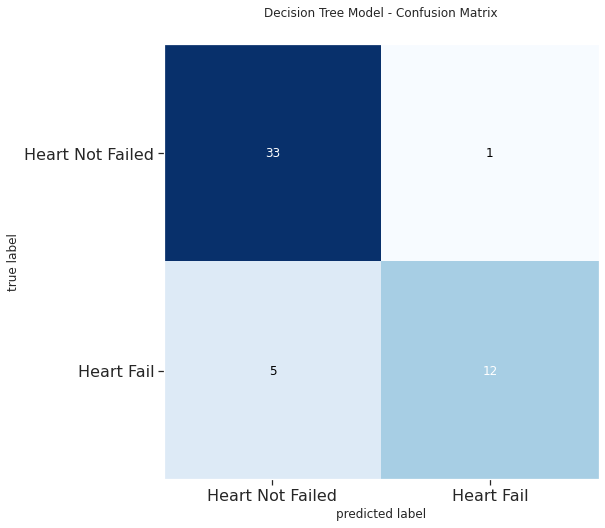

In [ ]:
cm = confusion_matrix(y_test, decision_y_pred)
plt.figure()
plot_confusion_matrix(cm, figsize=(12,8), hide_ticks=True, cmap=plt.cm.Blues)
plt.title("Decision Tree Model - Confusion Matrix")
plt.xticks(range(2), ["Heart Not Failed","Heart Fail"], fontsize=16)
plt.yticks(range(2), ["Heart Not Failed","Heart Fail"], fontsize=16)
plt.show()

### Accuracy Score

In [ ]:
decision_ac = accuracy_score(y_test, decision_y_pred)
print(Fore.GREEN + "Accuracy of Decision Tree is : ", "{:.2f}%".format(100* decision_ac))
accuracy_list.append(100*decision_ac)

Accuracy of Decision Tree is :  88.24%


## Random Forest Classifier

### Train Random Forest Model

In [ ]:
forest_classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
forest_classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

### Predicting the Test set results

In [ ]:
forest_y_pred = forest_classifier.predict(X_test)

### Confusion Matrix

<Figure size 1080x432 with 0 Axes>

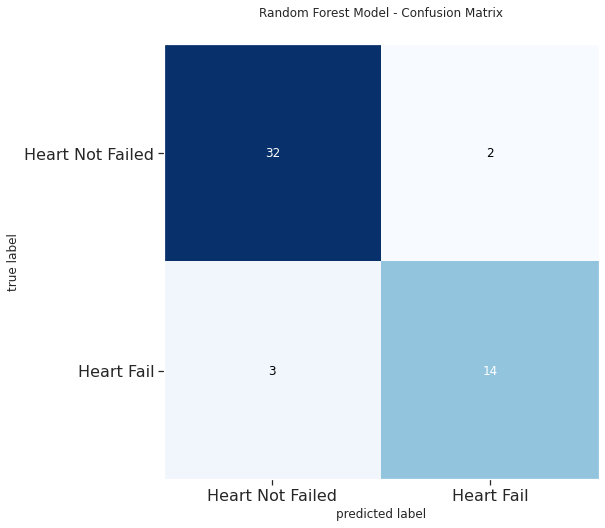

In [ ]:
cm = confusion_matrix(y_test, forest_y_pred)
plt.figure()
plot_confusion_matrix(cm, figsize=(12,8), hide_ticks=True, cmap=plt.cm.Blues)
plt.title("Random Forest Model - Confusion Matrix")
plt.xticks(range(2), ["Heart Not Failed","Heart Fail"], fontsize=16)
plt.yticks(range(2), ["Heart Not Failed","Heart Fail"], fontsize=16)
plt.show()

### Accuracy Score

In [ ]:
forest_ac = accuracy_score(y_test, forest_y_pred)
print(Fore.GREEN + "Accuracy of Random Forest is : ", "{:.2f}%".format(100* forest_ac))
accuracy_list.append(100*forest_ac)

Accuracy of Random Forest is :  90.20%


# Models Accuracy Score

In [ ]:
model_list = ['Logistic Regression', 'SVM', 'Kernel SVM', 'Naive Bayes', 'KNearest Neighbours', 'Decision Tree', 'Random Forest']

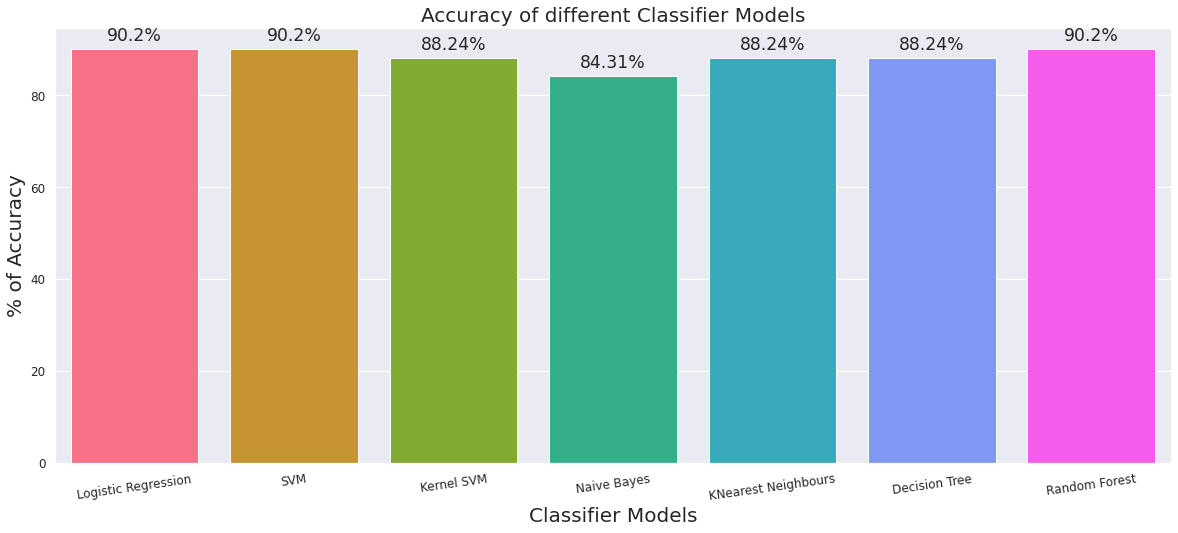

In [ ]:
plt.rcParams['figure.figsize']=20,8
sns.set_style('darkgrid')
ax = sns.barplot(x=model_list, y=accuracy_list, palette = "husl", saturation =2.0)
plt.xlabel('Classifier Models', fontsize = 20 )
plt.ylabel('% of Accuracy', fontsize = 20)
plt.title('Accuracy of different Classifier Models', fontsize = 20)
plt.xticks(fontsize = 12, horizontalalignment = 'center', rotation = 8)
plt.yticks(fontsize = 12)
for i in ax.patches:
    width, height = i.get_width(), i.get_height()
    x, y = i.get_xy() 
    ax.annotate(f'{round(height,2)}%', (x + width/2, y + height*1.02), ha='center', fontsize = 'x-large')
plt.show()



# Fine Tune Hypermeter


**Logistic Regression**
> L1 and L2 are regularization parameters.They're used to avoid overfiting.Both L1 and L2 regularization prevents overfitting by shrinking (imposing a penalty) on the coefficients.

> L1 is the first moment norm |x1-x2| (|w| for regularization case) that is simply the absolute dıstance between two points where L2 is second moment norm corresponding to Eucledian Distance that is |x1-x2|^2 (|w|^2 for regularization case).
In simple words,L2 (Ridge) shrinks all the coefficient by the same proportions but eliminates none, while L1 (Lasso) can shrink some coefficients to zero, performing variable selection. If all the features are correlated with the label, ridge outperforms lasso, as the coefficients are never zero in ridge. If only a subset of features are correlated with the label, lasso outperforms ridge as in lasso model some coefficient can be shrunken to zero.

**Support Vector Classifier**
> The gamma parameter defines how far the influence of a single training example reaches, with low values meaning ‘far’ and high values meaning ‘close’. The gamma parameters can be seen as the inverse of the radius of influence of samples selected by the model as support vectors.
The C parameter trades off misclassification of training examples against simplicity of the decision surface. A low C makes the decision surface 
smooth, while a high C aims at classifying all training examples correctly by giving the model freedom to select more samples as support vectors.

**DecisionTree Classifier**


> 1) Criterion: Decision trees use multiple algorithms to decide to split a node in two or more sub-nodes.Decision tree splits the nodes on all 
available variables and then selects the split which results in most homogeneous sub-nodes. The details of Gini and entropy needs detail explanation.

> 2) max_depth(Maximum depth of tree (vertical depth)): Used to control over-fitting as higher depth will allow model to learn relations very specific to a particular sample.

> max_features and min_samples_leaf is same as Random Forest classifier


**Random Forest Classifier**
> There are 3 features which can be tuned to improve the performance of Random Forest

> 1) max_features 2) n_estimators 3) min_sample_leaf

> A) max_features: These are the maximum number of features Random Forest is allowed to try in individual tree. 1)Auto : This will simply take all the features which make sense in every tree.Here we simply do not put any restrictions on the individual tree. 2)sqrt : This option will take square root of the total number of features in individual run. For instance, if the total number of variables are 100, we can only take 10 of them in individual tree. 3)log2:It is another option which takes log to the base 2 of the features input.

> Increasing max_features generally improves the performance of the model as at each node now we have a higher number of options to be considered.But, for sure, you decrease the speed of algorithm by increasing the max_features. Hence, you need to strike the right balance and choose the optimal max_features.

> B) n_estimators : This is the number of trees you want to build before taking the maximum voting or averages of predictions. Higher number of trees give you better performance but makes your code slower. You should choose as high value as your processor can handle because this makes your predictions stronger and more stable.

> C) min_sample_leaf: Leaf is the end node of a decision tree. A smaller leaf makes the model more prone to capturing noise in train data. Hence it is important to try different values to get good estimate.







In [ ]:
from sklearn.model_selection import GridSearchCV

# Logistic Regression 
log_reg_params = {
                  'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]
                }
grid_log_reg = GridSearchCV(LogisticRegression(), log_reg_params, cv=10)
grid_log_reg.fit(X_train, y_train)
# We automatically get the logistic regression with the best parameters.
log_reg = grid_log_reg.best_estimator_

# KNearest
knears_params = {
      "n_neighbors": list(range(1,100,1)), 
      'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
      }
grid_knears = GridSearchCV(KNeighborsClassifier(), knears_params, cv=10)
grid_knears.fit(X_train, y_train)
# KNears best estimator
knears_neighbors = grid_knears.best_estimator_

# Support Vector Classifier
svc_params = {
              'C': [0.5, 0.7, 0.9, 1, 10, 100,500, 1000], 
              'kernel': ['rbf', 'poly', 'sigmoid', 'linear']
              }
grid_svc = GridSearchCV(SVC(), svc_params, cv=10)
grid_svc.fit(X_train, y_train)
# SVC best estimator
svc = grid_svc.best_estimator_

# DecisionTree Classifier
tree_params= {
                'criterion': ['gini','entropy'], 
                'max_features': ["auto","sqrt","log2"],
                'min_samples_leaf': range(1,100,1) , 
                'max_depth': range(1,50,1)
              }
grid_tree = GridSearchCV(DecisionTreeClassifier(), tree_params, cv=10)
grid_tree.fit(X_train, y_train)
# tree best estimator
tree_clf = grid_tree.best_estimator_

# Naive Bayes (There isn't a parameter to tune for naive bayes classifier)

# Random Forest
forest_params = {'n_estimators': range(10,100,10), 
              'max_features': ['log2', 'sqrt','auto'], 
              'criterion': ['entropy', 'gini'],
              'max_depth': [2, 3, 5, 10], 
              'min_samples_split': [2, 3, 5],
              'min_samples_leaf': range(10,100,10)
             }

forest_grid = GridSearchCV(RandomForestClassifier(), forest_params, cv=10)
forest_grid.fit(X_train, y_train)
random_forest = forest_grid.best_estimator_

In [ ]:
k_fold_accuracy_list = []
k_fold_stdev_list = []
model_list.remove('Kernel SVM')

logistic_accuracies = cross_val_score(estimator= log_reg, X=X_train, y=y_train, cv=10)
k_fold_accuracy_list.append(logistic_accuracies.mean() * 100)
k_fold_stdev_list.append(logistic_accuracies.std() * 100)

svm_accuracies = cross_val_score(estimator= svc, X=X_train, y=y_train, cv=10)
k_fold_accuracy_list.append(svm_accuracies.mean() * 100)
k_fold_stdev_list.append(svm_accuracies.std() * 100)

naive_accuracies = cross_val_score(estimator= naive_classifier, X=X_train, y=y_train, cv=10)
k_fold_accuracy_list.append(naive_accuracies.mean() * 100)
k_fold_stdev_list.append(naive_accuracies.std() * 100)

knn_accuracies = cross_val_score(estimator= knears_neighbors, X=X_train, y=y_train, cv=10)
k_fold_accuracy_list.append(knn_accuracies.mean() * 100)
k_fold_stdev_list.append(knn_accuracies.std() * 100)

decision_accuracies = cross_val_score(estimator= tree_clf, X=X_train, y=y_train, cv=10)
k_fold_accuracy_list.append(decision_accuracies.mean() * 100)
k_fold_stdev_list.append(decision_accuracies.std() * 100)

forest_accuracies = cross_val_score(estimator= random_forest, X=X_train, y=y_train, cv=10)
k_fold_accuracy_list.append(forest_accuracies.mean() * 100)
k_fold_stdev_list.append(forest_accuracies.std() * 100)

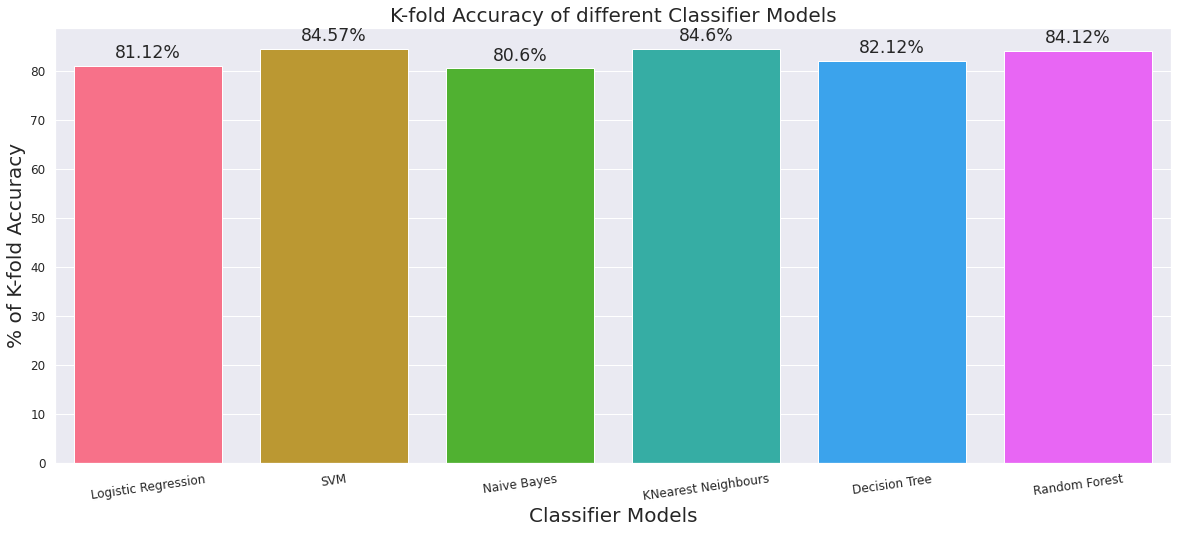

In [ ]:
plt.rcParams['figure.figsize']=20,8
sns.set_style('darkgrid')
ax = sns.barplot(x=model_list, y=k_fold_accuracy_list, palette = "husl", saturation =2.0)
plt.xlabel('Classifier Models', fontsize = 20 )
plt.ylabel('% of K-fold Accuracy', fontsize = 20)
plt.title('K-fold Accuracy of different Classifier Models', fontsize = 20)
plt.xticks(fontsize = 12, horizontalalignment = 'center', rotation = 8)
plt.yticks(fontsize = 12)
for i in ax.patches:
    width, height = i.get_width(), i.get_height()
    x, y = i.get_xy() 
    ax.annotate(f'{round(height,2)}%', (x + width/2, y + height*1.02), ha='center', fontsize = 'x-large')
plt.show()

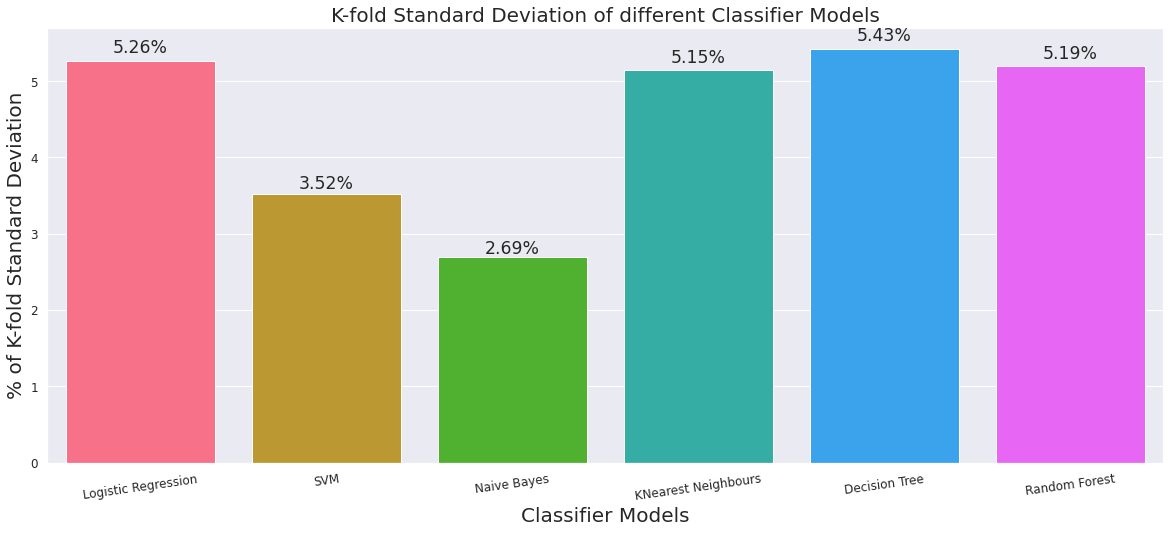

In [ ]:
plt.rcParams['figure.figsize']=20,8
sns.set_style('darkgrid')
ax = sns.barplot(x=model_list, y=k_fold_stdev_list, palette = "husl", saturation =2.0)
plt.xlabel('Classifier Models', fontsize = 20 )
plt.ylabel('% of K-fold Standard Deviation', fontsize = 20)
plt.title('K-fold Standard Deviation of different Classifier Models', fontsize = 20)
plt.xticks(fontsize = 12, horizontalalignment = 'center', rotation = 8)
plt.yticks(fontsize = 12)
for i in ax.patches:
    width, height = i.get_width(), i.get_height()
    x, y = i.get_xy() 
    ax.annotate(f'{round(height,2)}%', (x + width/2, y + height*1.02), ha='center', fontsize = 'x-large')
plt.show()

# Classification Report

In [ ]:
from sklearn.metrics import classification_report

print('Logistic Regression:')
y_pred_log_reg = log_reg.predict(X_test)
print(classification_report(y_test, y_pred_log_reg))

print('Support Vector Classifier:')
y_pred_svc = svc.predict(X_test)
print(classification_report(y_test, y_pred_svc))

print('Naive Bayes Classifier:')
y_pred_naive = naive_classifier.predict(X_test)
print(classification_report(y_test, y_pred_naive))

print('KNears Neighbors:')
y_pred_knear = knears_neighbors.predict(X_test)
print(classification_report(y_test, y_pred_knear))

print('Decision Tree Classifier:')
y_pred_tree = tree_clf.predict(X_test)
print(classification_report(y_test, y_pred_tree))

print('Random Forest Classifier:')
y_pred_forest = random_forest.predict(X_test)
print(classification_report(y_test, y_pred_forest))

Logistic Regression:
              precision    recall  f1-score   support

           0       0.87      1.00      0.93        34
           1       1.00      0.71      0.83        17

    accuracy                           0.90        51
   macro avg       0.94      0.85      0.88        51
weighted avg       0.91      0.90      0.90        51

Support Vector Classifier:
              precision    recall  f1-score   support

           0       0.89      0.94      0.91        34
           1       0.87      0.76      0.81        17

    accuracy                           0.88        51
   macro avg       0.88      0.85      0.86        51
weighted avg       0.88      0.88      0.88        51

Naive Bayes Classifier:
              precision    recall  f1-score   support

           0       0.84      0.94      0.89        34
           1       0.85      0.65      0.73        17

    accuracy                           0.84        51
   macro avg       0.84      0.79      0.81        51
we

# Learning Curve

In [ ]:
from sklearn.model_selection import ShuffleSplit, learning_curve

def plot_learning_curve(estimator1, estimator2, estimator3, estimator4, estimator5, estimator6, X, y, ylim=None, cv=None, 
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
  f, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2, figsize=(20, 20),  sharey=True)
  if ylim is not None:
    plt.ylim(*ylim)
  
  # First Estimator
  train_sizes, train_scores, test_scores =  learning_curve(estimator1, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
  train_scores_mean = np.mean(train_scores, axis=1)
  train_scores_std = np.std(train_scores, axis=1)
  test_scores_mean = np.mean(test_scores, axis=1)
  test_scores_std = np.std(test_scores, axis=1)
  ax1.fill_between(
      train_sizes, 
      train_scores_mean - train_scores_std, 
      train_scores_mean + train_scores_std,
      alpha=0.1,
      color="#ff9124"
      )
  ax1.fill_between(
      train_sizes,
      test_scores_mean - test_scores_std,
      test_scores_mean + test_scores_std,
      alpha=0.1,
      color="#2492ff"
  )
  ax1.plot(
      train_sizes,
      train_scores_mean,
      'o-',
      color="#ff9124",
      label='Training Score'
      )
  ax1.plot(
      train_sizes,
      test_scores_mean,
      'o-',
      color="#2492ff",
      label='Cross-validation_score'
  )
  ax1.set_title('Logistic Regression Learning Curve', fontsize=14)
  ax1.set_xlabel('Train size(m)')
  ax1.set_ylabel('Score')
  ax1.grid(True)
  ax1.legend(loc='best')

  # Second Estimator
  train_sizes, train_scores, test_scores =  learning_curve(estimator2, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
  train_scores_mean = np.mean(train_scores, axis=1)
  train_scores_std = np.std(train_scores, axis=1)
  test_scores_mean = np.mean(test_scores, axis=1)
  test_scores_std = np.std(test_scores, axis=1)
  ax2.fill_between(
      train_sizes, 
      train_scores_mean - train_scores_std, 
      train_scores_mean + train_scores_std,
      alpha=0.1,
      color="#ff9124"
      )
  ax2.fill_between(
      train_sizes,
      test_scores_mean - test_scores_std,
      test_scores_mean + test_scores_std,
      alpha=0.1,
      color="#2492ff"
  )
  ax2.plot(
      train_sizes,
      train_scores_mean,
      'o-',
      color="#ff9124",
      label='Training Score'
      )
  ax2.plot(
      train_sizes,
      test_scores_mean,
      'o-',
      color="#2492ff",
      label='Cross-validation_score'
  )
  ax2.set_title('K-nearest Neighbor Learning Curve', fontsize=14)
  ax2.set_xlabel('Train size(m)')
  ax2.set_ylabel('Score')
  ax2.grid(True)
  ax2.legend(loc='best')

  # Third Estimator
  train_sizes, train_scores, test_scores =  learning_curve(estimator3, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
  train_scores_mean = np.mean(train_scores, axis=1)
  train_scores_std = np.std(train_scores, axis=1)
  test_scores_mean = np.mean(test_scores, axis=1)
  test_scores_std = np.std(test_scores, axis=1)
  ax3.fill_between(
      train_sizes, 
      train_scores_mean - train_scores_std, 
      train_scores_mean + train_scores_std,
      alpha=0.1,
      color="#ff9124"
      )
  ax3.fill_between(
      train_sizes,
      test_scores_mean - test_scores_std,
      test_scores_mean + test_scores_std,
      alpha=0.1,
      color="#2492ff"
  )
  ax3.plot(
      train_sizes,
      train_scores_mean,
      'o-',
      color="#ff9124",
      label='Training Score'
      )
  ax3.plot(
      train_sizes,
      test_scores_mean,
      'o-',
      color="#2492ff",
      label='Cross-validation_score'
  )
  ax3.set_title('SVC Learning Curve', fontsize=14)
  ax3.set_xlabel('Train size(m)')
  ax3.set_ylabel('Score')
  ax3.grid(True)
  ax3.legend(loc='best')

  # Fourth Estimator
  train_sizes, train_scores, test_scores =  learning_curve(estimator4, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
  train_scores_mean = np.mean(train_scores, axis=1)
  train_scores_std = np.std(train_scores, axis=1)
  test_scores_mean = np.mean(test_scores, axis=1)
  test_scores_std = np.std(test_scores, axis=1)
  ax4.fill_between(
      train_sizes, 
      train_scores_mean - train_scores_std, 
      train_scores_mean + train_scores_std,
      alpha=0.1,
      color="#ff9124"
      )
  ax4.fill_between(
      train_sizes,
      test_scores_mean - test_scores_std,
      test_scores_mean + test_scores_std,
      alpha=0.1,
      color="#2492ff"
  )
  ax4.plot(
      train_sizes,
      train_scores_mean,
      'o-',
      color="#ff9124",
      label='Training Score'
      )
  ax4.plot(
      train_sizes,
      test_scores_mean,
      'o-',
      color="#2492ff",
      label='Cross-validation_score'
  )
  ax4.set_title('Decision Tree Learning Curve', fontsize=14)
  ax4.set_xlabel('Train size(m)')
  ax4.set_ylabel('Score')
  ax4.grid(True)
  ax4.legend(loc='best')

  # Fifth Estimator
  train_sizes, train_scores, test_scores =  learning_curve(estimator5, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
  train_scores_mean = np.mean(train_scores, axis=1)
  train_scores_std = np.std(train_scores, axis=1)
  test_scores_mean = np.mean(test_scores, axis=1)
  test_scores_std = np.std(test_scores, axis=1)
  ax5.fill_between(
      train_sizes, 
      train_scores_mean - train_scores_std, 
      train_scores_mean + train_scores_std,
      alpha=0.1,
      color="#ff9124"
      )
  ax5.fill_between(
      train_sizes,
      test_scores_mean - test_scores_std,
      test_scores_mean + test_scores_std,
      alpha=0.1,
      color="#2492ff"
  )
  ax5.plot(
      train_sizes,
      train_scores_mean,
      'o-',
      color="#ff9124",
      label='Training Score'
      )
  ax5.plot(
      train_sizes,
      test_scores_mean,
      'o-',
      color="#2492ff",
      label='Cross-validation_score'
  )
  ax5.set_title('Naive Bayes Learning Curve', fontsize=14)
  ax5.set_xlabel('Train size(m)')
  ax5.set_ylabel('Score')
  ax5.grid(True)
  ax5.legend(loc='best')

  # Sixth Estimator
  train_sizes, train_scores, test_scores =  learning_curve(estimator6, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
  train_scores_mean = np.mean(train_scores, axis=1)
  train_scores_std = np.std(train_scores, axis=1)
  test_scores_mean = np.mean(test_scores, axis=1)
  test_scores_std = np.std(test_scores, axis=1)
  ax6.fill_between(
      train_sizes, 
      train_scores_mean - train_scores_std, 
      train_scores_mean + train_scores_std,
      alpha=0.1,
      color="#ff9124"
      )
  ax6.fill_between(
      train_sizes,
      test_scores_mean - test_scores_std,
      test_scores_mean + test_scores_std,
      alpha=0.1,
      color="#2492ff"
  )
  ax6.plot(
      train_sizes,
      train_scores_mean,
      'o-',
      color="#ff9124",
      label='Training Score'
      )
  ax6.plot(
      train_sizes,
      test_scores_mean,
      'o-',
      color="#2492ff",
      label='Cross-validation_score'
  )
  ax6.set_title('Random Forest Learning Curve', fontsize=14)
  ax6.set_xlabel('Train size(m)')
  ax6.set_ylabel('Score')
  ax6.grid(True)
  ax6.legend(loc='best')

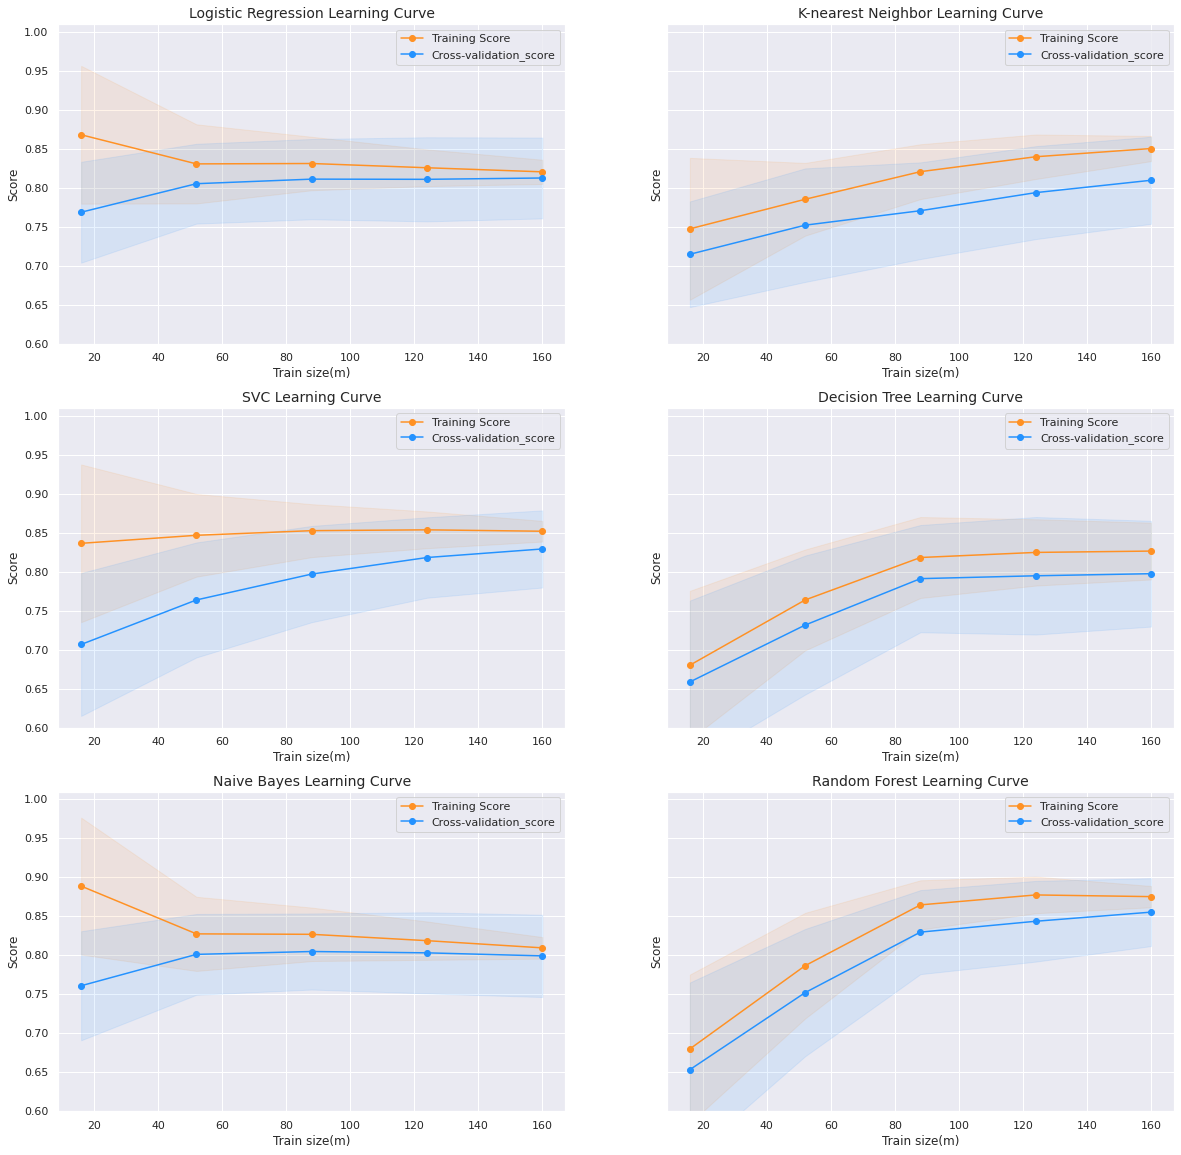

In [ ]:
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=42)
plot_learning_curve(log_reg, knears_neighbors, svc, tree_clf, naive_classifier, random_forest, X_train, y_train, (0.6, 1.01), cv=cv, n_jobs=4)

# ROC Curve

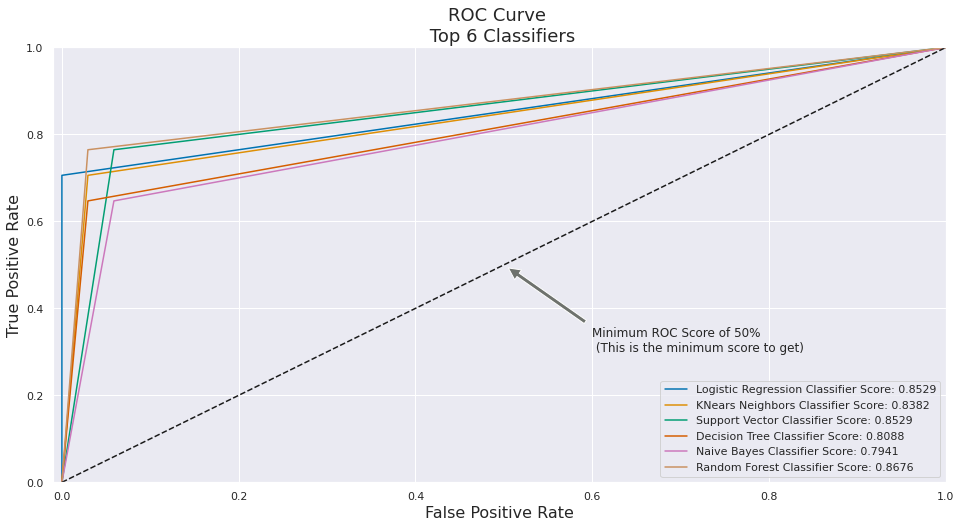

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

log_fpr, log_tpr, log_threshold = roc_curve(y_test, y_pred_log_reg)
knear_fpr, knear_tpr, knear_threshold = roc_curve(y_test, y_pred_knear)
svc_fpr, svc_tpr, svc_threshold = roc_curve(y_test, y_pred_svc)
tree_fpr, tree_tpr, tree_threshold = roc_curve(y_test, y_pred_tree)
naive_fpr, naive_tpr, naive_threshold = roc_curve(y_test, y_pred_naive)
random_fpr, random_tpr, random_threshold = roc_curve(y_test, y_pred_forest)

def graph_roc_curve_multiple(log_fpr, log_tpr, knear_fpr, knear_tpr, svc_fpr, svc_tpr, tree_fpr, tree_tpr, naive_fpr, naive_tpr, random_fpr,
                             random_tpr):
  plt.figure(figsize=(16, 8))
  plt.title('ROC Curve \n Top 6 Classifiers', fontsize=18)
  plt.plot(log_fpr, log_tpr, label='Logistic Regression Classifier Score: {:.4f}'.format(roc_auc_score(y_test, y_pred_log_reg)))
  plt.plot(knear_fpr, knear_tpr, label='KNears Neighbors Classifier Score: {:.4f}'.format(roc_auc_score(y_test, y_pred_knear)))
  plt.plot(svc_fpr, svc_tpr, label='Support Vector Classifier Score: {:.4f}'.format(roc_auc_score(y_test, y_pred_svc)))
  plt.plot(tree_fpr, tree_tpr, label='Decision Tree Classifier Score: {:.4f}'.format(roc_auc_score(y_test, y_pred_tree)))
  plt.plot(naive_fpr, naive_tpr, label='Naive Bayes Classifier Score: {:.4f}'.format(roc_auc_score(y_test, y_pred_naive)))
  plt.plot(random_fpr, random_tpr, label='Random Forest Classifier Score: {:.4f}'.format(roc_auc_score(y_test, y_pred_forest)))
  plt.plot([0, 1], [0, 1], 'k--')
  plt.axis([-0.01, 1, 0, 1])
  plt.xlabel('False Positive Rate', fontsize=16)
  plt.ylabel('True Positive Rate', fontsize=16)
  plt.annotate('Minimum ROC Score of 50% \n (This is the minimum score to get)', xy=(0.5, 0.5), xytext=(0.6, 0.3),
              arrowprops=dict(facecolor='#6E726D', shrink=0.05),
              )
  plt.legend()

graph_roc_curve_multiple(log_fpr, log_tpr, knear_fpr, knear_tpr, svc_fpr, svc_tpr, tree_fpr, tree_tpr, naive_fpr, naive_tpr, random_fpr,
                             random_tpr)
plt.show()